In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run SAT_Scores.ipynb
%run crimes_report.ipynb


In [7]:
for index, row in scores_df.iterrows():
    number = row['Percent Tested']
    number = pd.to_numeric(number)
    scores_df.at[index, 'Percent Tested'] = number
    
scores_df2 = pd.DataFrame()
scores_df2['average'] = scores_df.groupby('Zip Code')['Percent Tested'].transform(lambda x : x.mean())

scores_df.groupby('Zip Code').transform(lambda x : x.mean())

scores_df.groupby('Zip Code')['Percent Tested'].transform(lambda x : x.mean())

scores_df['average'] = scores_df.groupby('Zip Code')['Percent Tested'].transform(
    lambda x : x.mean()
)

scores_mean = scores_df.groupby('Zip Code').aggregate('mean')
scores_top_5 = scores_mean.head()
print(scores_top_5)

          Average Score (SAT Math)  Average Score (SAT Writing)    average
Zip Code                                                                  
10002                   472.909091                   437.454545  73.563636
10003                   449.600000                   430.600000  73.700000
10004                   463.000000                   455.250000  76.950000
10006                   429.500000                   419.500000  60.850000
10009                   454.000000                   445.000000  85.200000


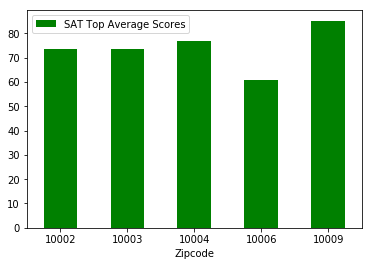

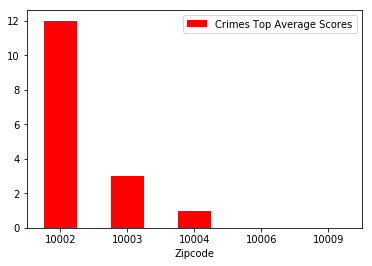

In [51]:
sat_high_score = pd.DataFrame({'Zipcode': scores_top_5.index.values, 'val': scores_top_5['average']})
zip_10002 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10002']['Crimes']
zip_10003 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10003']['Crimes']
zip_10004 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10004']['Crimes']
zip_10006 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10006']['Crimes']
zip_10009 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10009']['Crimes']

crimes_zipcode = pd.DataFrame({'Zipcode': ['10002', '10003', '10004', '10006', '10009'],
                               'val':[ 12, 3, 1, 0, 0]})

sat_high_score_ax = sat_high_score.plot.bar(x='Zipcode', y='val', rot=0, color='green')
crimes_zipcode_ax = crimes_zipcode.plot.bar(x='Zipcode', y='val', rot=0, color='red')
sat_high_score_ax.legend(["SAT Top Average Scores"]);
crimes_zipcode_ax.legend(["Crimes Top Average Scores"]);

In [9]:
scores_lowest_5 = scores_mean.nsmallest(5, 'average')
scores_lowest_5

,Average Score (SAT Math),Average Score (SAT Writing),average
Zip Code,,,
10462,408.0,404.0,32.50
11418,413.0,399.0,37.90
11385,452.0,416.0,38.90
11222,383.0,364.0,38.95
11427,397.0,391.0,40.00


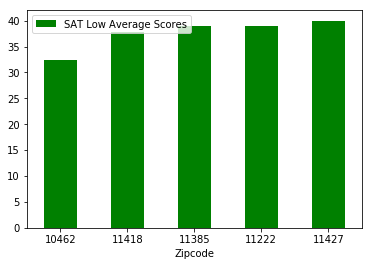

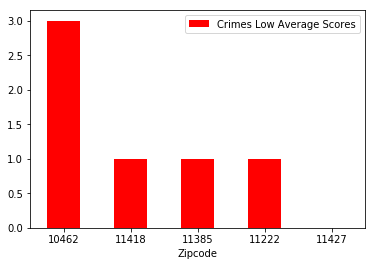

In [57]:
sat_low_score = pd.DataFrame({'Zipcode': scores_lowest_5.index.values, 'val': scores_lowest_5['average']})
zip_10002 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '10462']['Crimes']
zip_10003 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '11418']['Crimes']
zip_10004 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '11385']['Crimes']
zip_10006 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '11222']['Crimes']
zip_10009 = crimes_df_2.loc[crimes_df_2['Zip Codes'] == '11427']['Crimes']

crimes_zipcode = pd.DataFrame({'Zipcode': ['10462', '11418', '11385', '11222', '11427'],
                               'val':[ 3, 1, 1, 1, 0]})

sat_low_score_ax = sat_low_score.plot.bar(x='Zipcode', y='val', rot=0, color='green')
crimes_zipcode_ax = crimes_zipcode.plot.bar(x='Zipcode', y='val', rot=0, color='red')

sat_low_score_ax.legend(["SAT Low Average Scores"]);
crimes_zipcode_ax.legend(["Crimes Low Average Scores"]);